### **`Daegu Apartment Data Rent Price Prediction`**

### **Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### `Initial Setup`

In [1]:
# Import library eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from phik import phik_matrix

import warnings
warnings.filterwarnings('ignore')

### `Business Problem Understanding`

**Background**

Permasalahan utama yang sedang dihadapi oleh sektor industri apartemen di Korea saat ini adalah kelebihan pasokan unit yang tidak terjual di pasar. Hal tersebut telah menyebabkan penundaan atau penghentian proyek-proyek konstruksi. Pada akhir tahun lalu, tercatat adanya 68.000 unit apartemen yang tersedia, meningkat sebanyak 10.000 unit dari bulan sebelumnya. Ini merupakan kali pertama dalam tujuh tahun terakhir jumlah apartemen yang tidak terjual melewati angka 60.000 unit.

Selain itu, angka penjualan unit apartemen pada bulan Januari juga menunjukkan kinerja yang mengecewakan. Hanya terjual sebesar 25% dari estimasi keseluruhan, dengan angka aktual penjualan hanya mencapai 1.461 unit di seluruh negeri.

Situasi semakin rumit dengan adanya faktor eksternal seperti naiknya suku bunga pinjaman, turunnya harga rumah, dan kemunculan komunitas-komunitas baru yang juga memasarkan unit perumahan mereka. Semua hal ini berkontribusi pada perlu dikelolanya pasokan perumahan dengan baik.

Tingginya jumlah kelebihan pasokan di kawasan Daegu menjadi perhatian serius bagi pemerintah setempat. Untuk mencapai pasar yang lebih stabil, pemerintah telah memblokir pasar perumahan, mengakibatkan 13.445 unit (sekitar 19,4% dari total 66.107 unit) harus menghadapi tantangan dalam penjualan. Pemerintah juga berusaha mengendalikan pasokan dengan cara meminta distrik-distrik yang sudah memiliki persetujuan sebelumnya untuk menunda jadwal proyek atau mengubahnya menjadi unit sewa.

Secara keseluruhan, prospek pasar perumahan tidak terlihat cerah, dan banyak unit rumah yang diharapkan untuk dijual bahkan mungkin akan sulit terjual atau disewakan.

Sumber : https://koreajoongangdaily.joins.com/2023/02/07/business/industry/housing/20230207175620058.html

**Problem Statement**

Tantangan utama yang dihadapi oleh pengembang apartemen dari latar belakang kondisi pasar apartemen di Daegu adalah mengantisipasi perubahan pasar yang dapat mempengaruhi harga sewa apartemen. 

**Goals**

Prediksi harga sewa yang optimal dapat membantu pengembang untuk mengantisipasi perubahan pasar yang berpotensi mempengaruhi harga sewa apartemen. Dengan memahami tren pasar dan potensi fluktuasi harga, mereka dapat mengambil tindakan yang tepat untuk mengurangi risiko dan mengoptimalkan portfolio.

**Analytic Approach**

Analitic approach untuk prediksi harga sewa apartemen melibatkan berbagai metode analisis dan pendekatan yang digunakan untuk mengidentifikasi pola, tren, dan hubungan dalam data harga sewa apartemen. 

**Metric Evaluation**

Untuk memprediksi harga jual apartemen, terdapat beberapa metrik evaluasi yang tepat untuk digunakan dalam evaluasi model regresi. Berikut beberapa di antaranya:

* R-square: digunakan untuk menentukan seberapa baik model dapat merepresentasikan keseluruhan keragaman data, di mana kisarannya antara 0 dan 1. Semakin besar nilai R-square (mendekati 1), semakin banyak variasi target (harga) yang dapat dijelaskan oleh model. Semakin mendekati 1, semakin baik model tersebut cocok dengan data observasi.

* Root Mean Squared Error (RMSE): RMSE adalah akar dari MSE dan sering digunakan karena memberikan interpretasi hasil yang lebih sesuai dengan skala data. Nilai RMSE menggambarkan rata-rata selisih antara prediksi dan nilai sebenarnya dalam satuan yang sama dengan variabel target.

* Mean Absolute Error (MAE): MAE mengukur rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. MAE lebih tahan terhadap nilai outlier dibandingkan dengan MSE, sehingga lebih sesuai jika data mengandung banyak outlier.

* Mean Absolute Percentage Error (MAPE): MAPE mengukur persentase rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. Ini memberikan pemahaman tentang tingkat kesalahan relatif dari model. MAPE sering digunakan dalam kasus di mana interpretasi persentase kesalahan lebih relevan.

Pemilihan metrik evaluasi yang tepat tergantung pada karakteristik data dan tujuan prediksi. R-square digunakan untuk data yang cenderung linier. RMSE sering digunakan karena sifat matematisnya yang memudahkan perhitungan dan interpretasi. Namun MAE dan MAPE dapat lebih sesuai dalam beberapa kasus tertentu, terutama jika data memiliki nilai outlier yang signifikan. 

Sumber:
http://dx.doi.org/10.7717/peerj-cs.623 

### `Data Understanding`

| **Variabel** | **Definisi**| **Tipe Data** |
| --- | --- | --- |
| HallwayType | Tipe apartemen | Object |
| TimeToSubway | Waktu yang dibutuhkan untuk menuju stasiun kereta bawah tanah terdekat | Object |
| SubwayStation | Nama stasiun kereta bawah tanah terdekat | Object|
| N_FacilitiesNearBy(ETC) | Jumlah fasilitas lain terdekat | Float |
| N_FacilitiesNearBy(PublicOffice) | Jumlah fasilitas kantor publik terdekat | Float |
| N_SchoolNearBy(University) | Jumlah universitas terdekat | Float |
| N_Parkinglot(Basement) | Jumlah tempat parkir | Float |
| YearBuilt | Tahun apartemen dibangun | Integer |
| N_FacilitiesInApt | Jumlah fasilitas dalam apartemen | Integer |
| Size(sqft) | Ukuran apartemen (dalam satuan kaki persegi) | Integer |
| SalePrice | Harga sewa apartemen (Won) | Integer |

In [2]:
# Load data

data = pd.read_csv(r'D:\JCDS_2023\Capstone 3\data\data_daegu_apartment.csv')

print(f'Jumlah baris dan kolom: {data.shape}')
data.sample(5)

Jumlah baris dan kolom: (4123, 11)


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
2192,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,868,340707
1376,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,232743
104,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,469026
3160,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,255442
750,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,910,203646


#### **Initial Assesment**

In [3]:
pd.DataFrame({
    'column': data.columns.values,
    'type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,column,type,null,negative,n_unique,sample_unique
0,HallwayType,object,0.0,False,3,"[terraced, mixed, corridor]"
1,TimeToSubway,object,0.0,False,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min,..."
2,SubwayStation,object,0.0,False,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bang..."
3,N_FacilitiesNearBy(ETC),float64,0.0,False,4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0.0,False,8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),float64,0.0,False,6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),float64,0.0,False,20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0..."
7,YearBuilt,int64,0.0,False,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 199..."
8,N_FacilitiesInApt,int64,0.0,False,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),int64,0.0,False,89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 11..."


In [4]:
# Showing descriptive statistic of the dataset

display(data.describe(), data.describe(include='object'))

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


__Insight__

* Dataset Daegu Apartemen terdiri dari 11 kolom dan 4123 baris.
* Informasi dalam dataset mendeskripsikan variabel-variabel yang terkait harga dengan karakteristik apartemen di Kota Daegu, Korea Selatan.
* Variabel numerik pada dataset terdiri dari kolom N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), N_SchoolNearBy(University), N_Parkinglot(Basement), YearBuilt, N_FacilitiesInApt, Size(sqf), SalePrice.
* Variabel kategorical terdiri dari kolom HallwayType, TimeToSubway, dan SubwayStation.
* Tidak ditemukan nilai kosong atau null dalam dataset.
* Nilai 0 pada beberapa variabel jumlah fasilitas terdekat merupakan nilai yang wajar karena menunjukan ketidaktersediaan fasilitas tersebut. 
* Jumlah fasilitas umum dan universitas terdekat paling banyak berjumlah 5.
* Jumlah kantor publik terdekat paling banyak berjumlah 7.
* Jumlah tempat parkir terdekat rata-rata berjumlah 536. Tempat parkir merupakan salah satu pertimbangan dalam menentukan harga sewa karena beberapa apartemen di korea memberikan tambahan biaya untuk tempat parkir, sehingga keberadaan tempat parkir terdekat menjadi pertimbangan dalam menentukan harga.
* Harga sewa pada daegu apartemen dataset paling tinggi yaitu 585840 (won) dan rata-ratanya 221767 (won). Harga tersebut berada dalam harga yang wajar dalam penyewaan apartemen dalam sebulan di Daegu.
* SubwayStation merupakan variabel kategorikal dengan kardinalitas tertinggi.

Sumber:
https://www.numbeo.com/property-investment/in/Daegu

#### **Numerical variable**

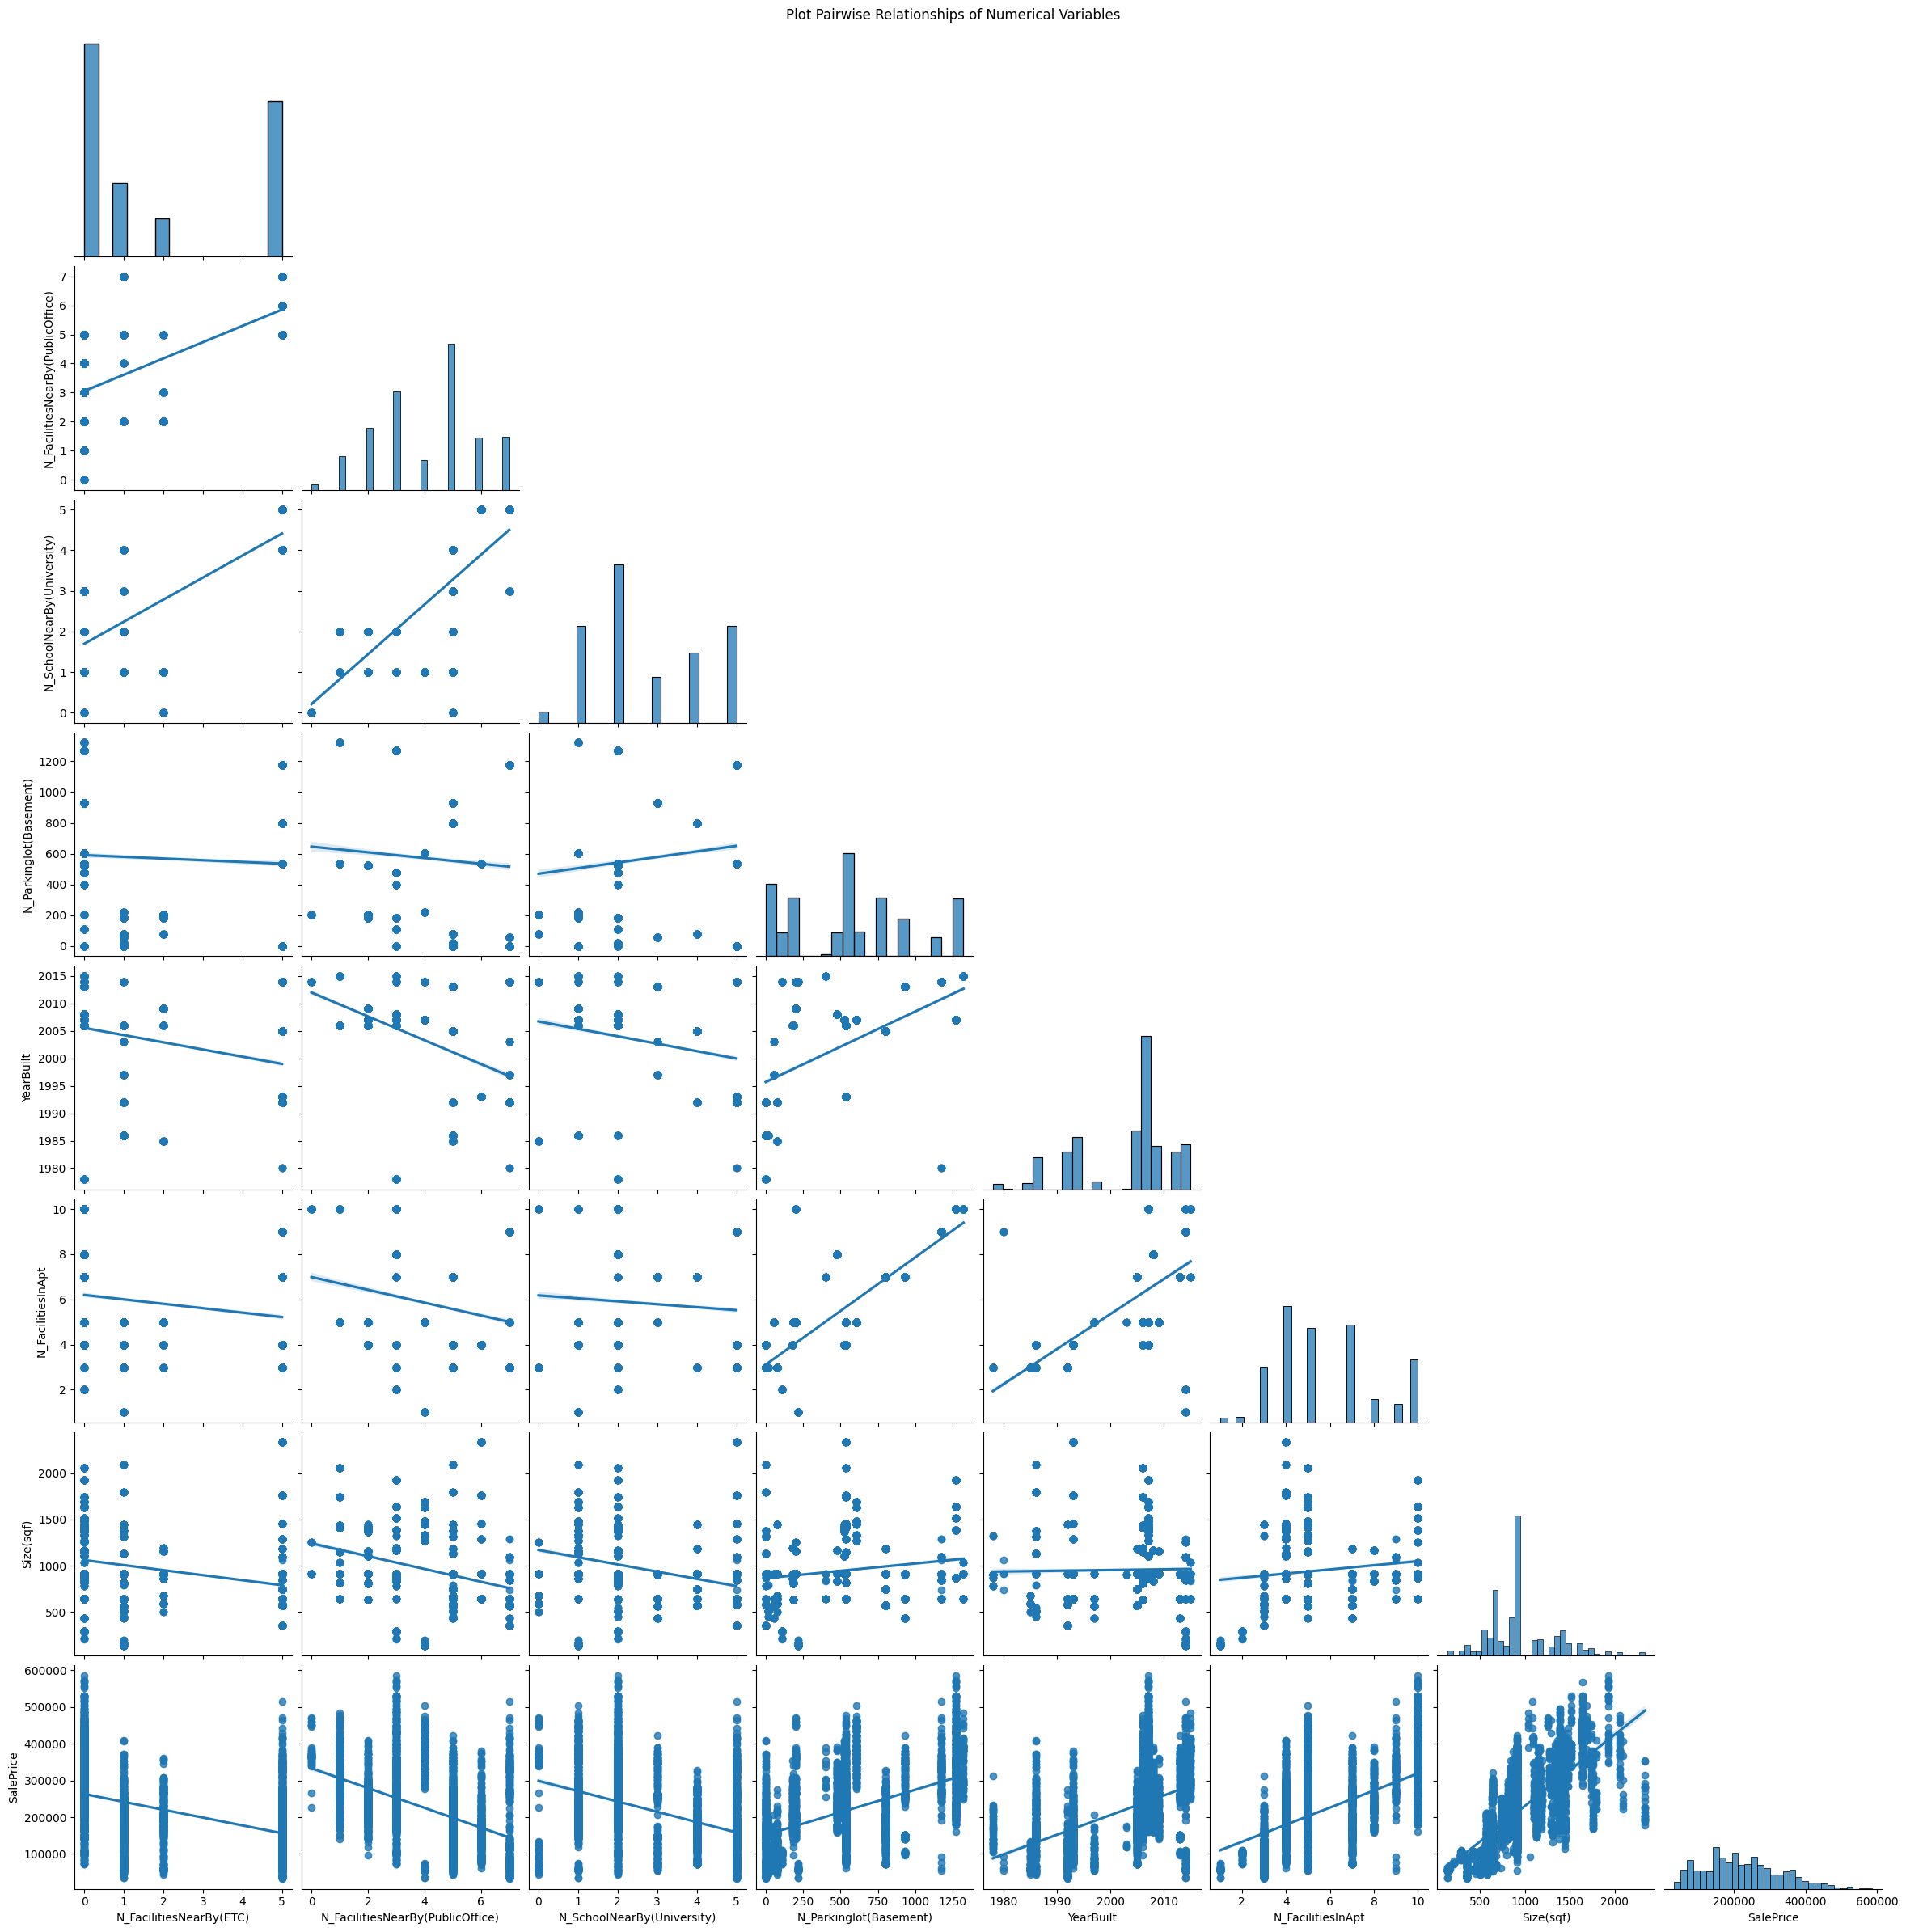

In [5]:
numerical = [var for var in data.columns if data[var].dtype != 'category']

graph = sns.pairplot(data[numerical], height=3.0, corner=True, kind='reg')
graph.fig.suptitle("Plot Pairwise Relationships of Numerical Variables", y=1.0)
plt.show()

__Insight :__

* Variabel YearBuilt, Size, dan SalePrice termasuk kedalam variabel kontinu.
* Variabel N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), N_SchoolNearBy(University), N_Parkinglot(Basement), N_FacilitiesInApt, HallwayType, TimeToSubway, dan SubwayStation adalah variabel diskrit.
* Hubungan antarvariabel diskrit juga menggambarkan pola yang linier.
* Hubungan antara variabel Size dan SalePrice membentuk pola yang linear.
* Hubungan antara variabel SalePrice dan N_FacilitiesInApt juga mendeskripsikan hubungan yang linier.

#### **Categorical variable**

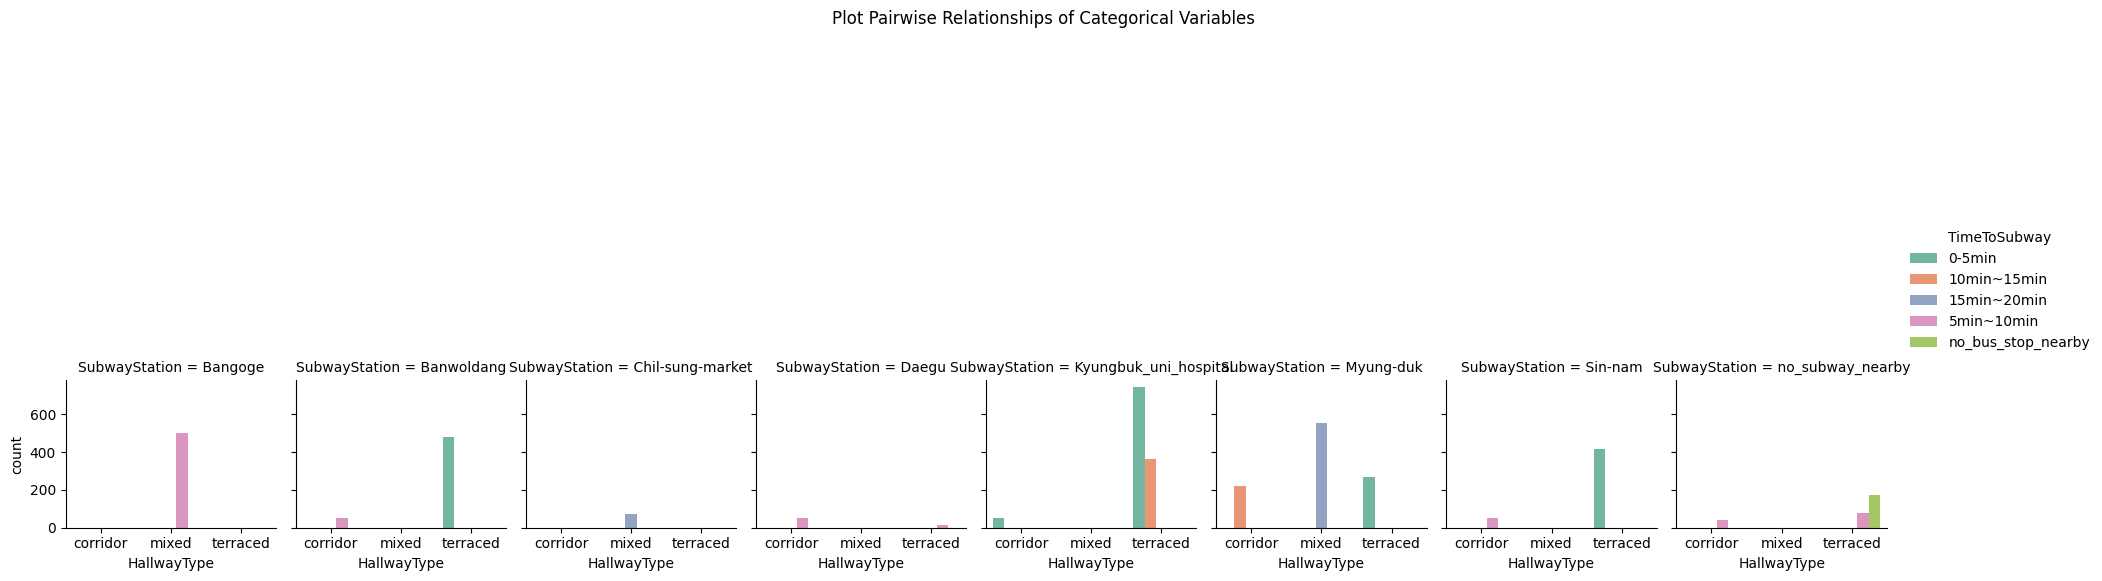

In [6]:
# Convert to categorical data type

data['HallwayType'] = data['HallwayType'].astype('category')
data['TimeToSubway'] = data['TimeToSubway'].astype('category')
data['SubwayStation'] = data['SubwayStation'].astype('category')

categorical = [var for var in data.columns if data[var].dtype.name == 'category']
graph = sns.catplot(data=data[categorical], x='HallwayType', hue='TimeToSubway', col='SubwayStation', kind='count', palette='Set2', height=2.4, aspect=1)
graph.fig.suptitle("Plot Pairwise Relationships of Categorical Variables", y=2.4)
plt.show()

__Insight__

* Apartemen dengan hallway type 'mixed' dekat dengan stasiun subway Bangoge dengan waktu tempuh antara 5-10 menit.
* Apartemen dengan hallway type 'terraced' dekat dengan stasiun subway Banwoldang dengan waktu tempuh antara 0-5 menit. 
* Stasiun Chil-sung-market juga merupakan stasiun yang terdekat dengan apartemen bertipe 'mixed' dengan jarak tempuh 15-20 menit.
* Stasiun Daegu merupakan stasiun yang terdekat dengan apartemen bertipe 'corridor' dengan jarak tempuh 5-10 menit.
* Stasiun Kyungbuk_uni_hospital merupakan stasiun yang terdekat dengan apartemen bertipe 'terraced' dengan jarak tempuh 0-5 menit.
* Waktu tempuh apartemen 'corridor' dengan stasiun terdekat Myung-duk yaitu 10-15 menit.
* Waktu tempuh apartemen 'teracced' dengan stasiun terdekat Sin-nam yaitu 0-5 menit.


### `Data Preprocessing`

In [7]:
df = data.copy()
df.sample(5)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
3962,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,172566
1271,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,587,55752
3604,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,1377,238938
1760,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,282566
3200,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1103,287610


#### **Exploratory Data Analysis**

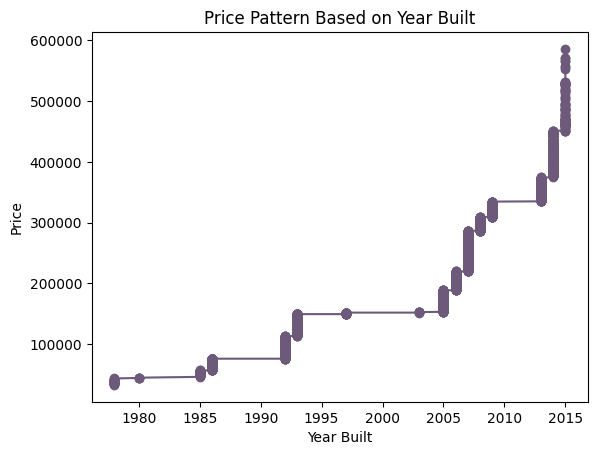

In [8]:
# Price pattern based on year built
 
price = df['SalePrice'].sort_values()
yr_built = df['YearBuilt'].sort_values()

plt.plot(yr_built, price, marker='o', linestyle='-', color='#6D597A', label='Line Plot')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.title('Price Pattern Based on Year Built')
plt.show()

__Insight__ 

* Tren harga dari tahun pembangunan 1980 hingga 2015 menunjukan kenaikan.
* Harga semakin mahal pada apartemen yang tahun pembangunannya terbaru. 
* Tahun bangunan 2015 memiliki range harga sewa tertinggi dibandingkan dengan tahun-tahun lainnya yaitu di antara 400000-600000 (won).


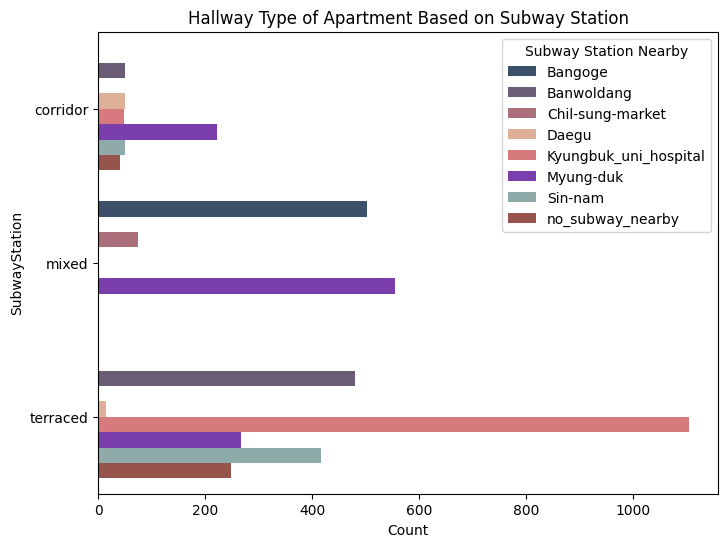

In [9]:
# Hallway type based on subway station

tipe_apt = df['HallwayType']
subway_stat = df['SubwayStation']

colors = ['#355070', '#6D597A', '#B56576', '#EAAC8B', '#E56B6F', '#7b2cbf', '#89b0ae', '#a44a3f']

plt.figure(figsize=(8, 6))
sns.countplot(y=tipe_apt, hue=subway_stat, palette=colors)

plt.title('Hallway Type of Apartment Based on Subway Station')
plt.xlabel('Count')
plt.ylabel('SubwayStation')
plt.legend(title='Subway Station Nearby')

plt.yticks(rotation=0)
plt.show()

__Insight__ 

* Apartemen dengan Hallway Type berjenis terraced paling banyak berada di dekat stasiun subway Kyungbuk_uni_hospital. Sedangkan stasiun yang jauh dari tipe apartemen tersebut adalah stasiun Daegu.
* Stasiun Myung-duk merupakan stasiun terdekat dengan tipe apartemen mixed. Stasiun terjauh dari tipe apartemen tersebut adalah Kyungbuk_uni_hospital.
* Tipe apartemen corridor juga dekat dengan stasiun Myung-duk. Daerah di sekitar apartemen tersebut juga ada yang tidak memiliki stasiun subway. 

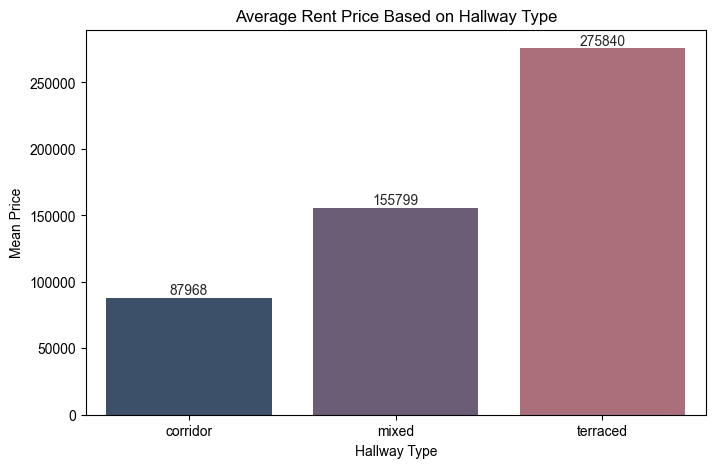

In [10]:
# Average apartment rent prices based on hallway type

table = df.pivot_table(columns='HallwayType', values='SalePrice', aggfunc='mean')

custom_palette = ['#355070', '#6D597A', '#B56576', '#EAAC8B', '#E56B6F', '#7b2cbf', '#89b0ae', '#a44a3f']

plt.figure(figsize=(8, 5))
mean_price = sns.barplot(data=table, palette=custom_palette)
sns.set_style("whitegrid")  

for container in mean_price.containers:
    for i, bar in enumerate(container):
        height = bar.get_height()
        if height > 0:
            mean_price.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

plt.xlabel('Hallway Type')
plt.ylabel('Mean Price')
plt.title('Average Rent Price Based on Hallway Type', fontsize=12)
plt.show()

__Insight__ 

* Rata-rata harga apartemen berjenis corridor sebesar 87968 (won).
* Rata-rata harga apartemen berjenis mixed sebesar 155799 (won).
* Rata-rata harga apartemen tertinggi yaitu terraced sebesar 275840 (won).

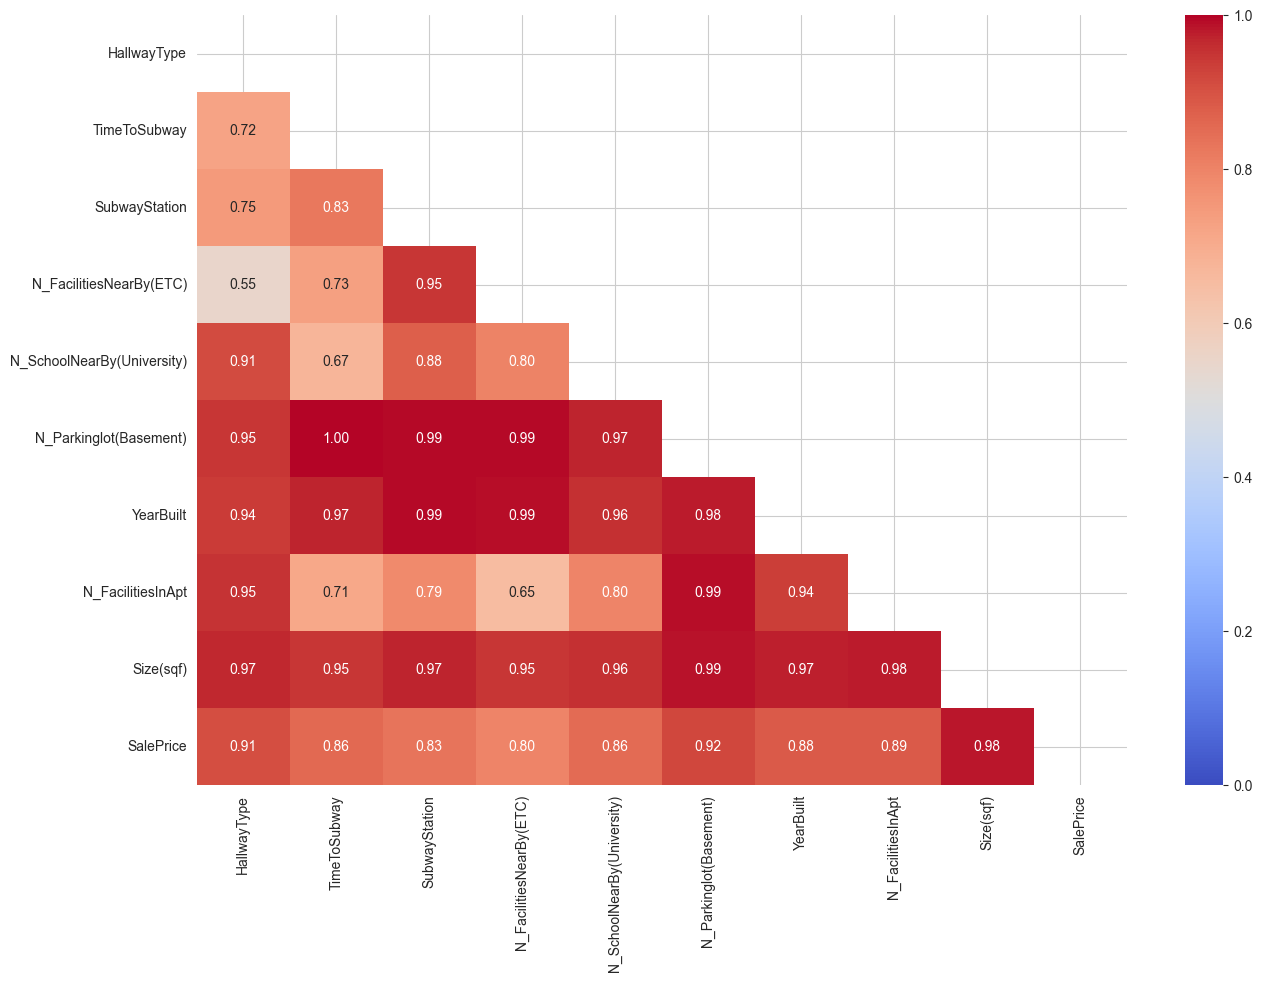

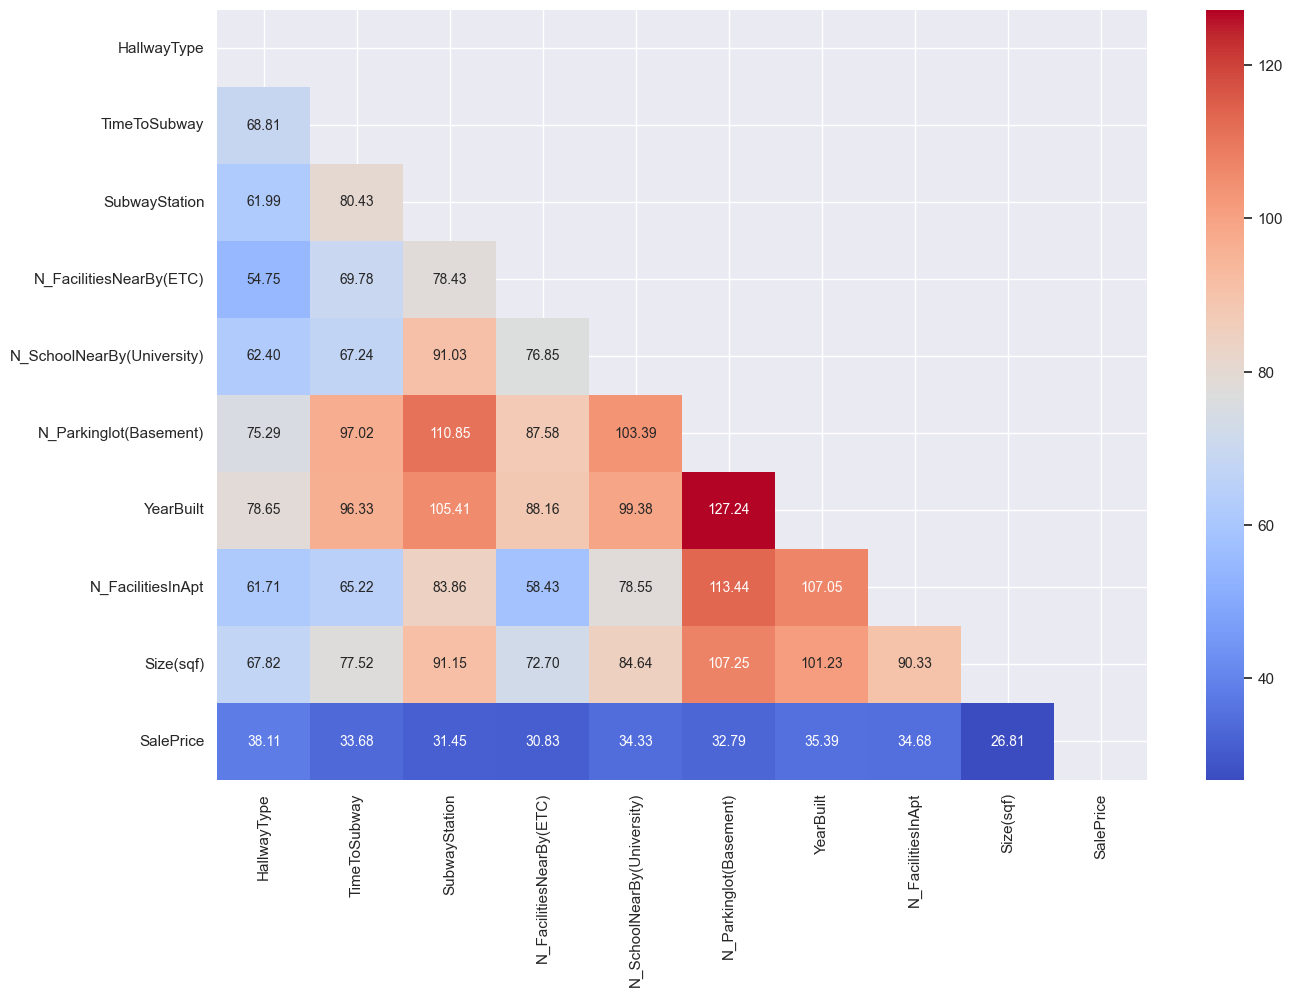

In [11]:
# Correlation from variables

cols = ['HallwayType', 'TimeToSubway', 'SubwayStation', 'N_FacilitiesNearBy(ETC)', 'N_SchoolNearBy(University)', 
        'N_Parkinglot(Basement)', 'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice']

# heatmap of variable correlation 
fig, ax = plt.subplots(figsize=(15, 10))
corr = df[cols].phik_matrix(interval_cols='SalePrice')
corr_mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="coolwarm", fmt='.2f', annot_kws={"fontsize":10})
sns.set(font_scale=1)
plt.show()

# heatmap of variable significance
fig, ax = plt.subplots(figsize=(15, 10))
sig = df[cols].significance_matrix(interval_cols='SalePrice')
sig_mask = np.triu(np.ones_like(sig, dtype=bool))
sns.heatmap(sig, mask=sig_mask, annot=True, cmap="coolwarm", fmt='.2f', annot_kws={"fontsize":10})
sns.set(font_scale=1)
plt.show()

__Insight__ 

* Korelasi antara variabel harga dengan faktor-faktor lain memiliki nilai di antara 0,8 sampai 0,98.
* Nilai korelasi antara harga dengan ukuran apartemen sebersar 0.98 merupakan yang terbesar dibandingkan dengan faktor lainnya.
* Nilai signifikansi dari korelasi antara harga dengan faktor-faktor lain berada di atas 26.
* Faktor yang memiliki nilai signifikansi tertinggi terhadap harga adalah hallway type dengan nilai 38,16.
* Semua faktor memiliki korelasi yang tinggi terhadap harga walaupun nilai signifikansinya rendah. Hal tersebut tidak menjadi problem dalam penentuan fitur untuk memprediksi model, sehingga tidak ada fitur yang perlu dihilangkan dari dataset daegu apartemen.

#### **Data Wrangling**

**Missing Value**

Deteksi dan kuantifikasi missing value.

<Axes: >

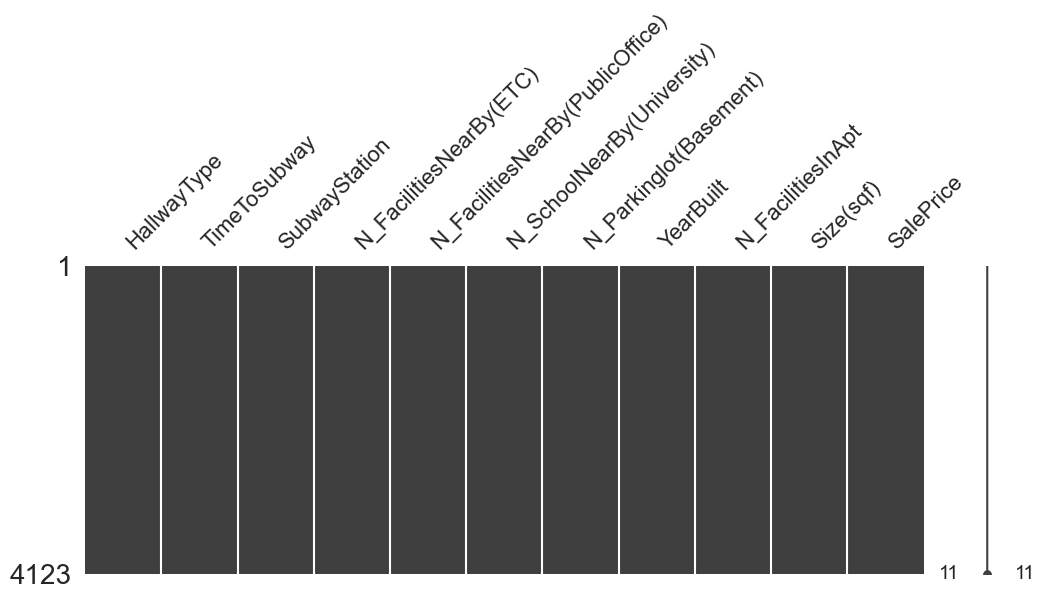

In [12]:
# Missing value matrix

msno.matrix(df, figsize=(12, 4))

In [13]:
# Percentage of missing value

df.isna().sum()/df.shape[0]*100

HallwayType                         0.0
TimeToSubway                        0.0
SubwayStation                       0.0
N_FacilitiesNearBy(ETC)             0.0
N_FacilitiesNearBy(PublicOffice)    0.0
N_SchoolNearBy(University)          0.0
N_Parkinglot(Basement)              0.0
YearBuilt                           0.0
N_FacilitiesInApt                   0.0
Size(sqf)                           0.0
SalePrice                           0.0
dtype: float64

__Insight__ 

* Berdasarkan matrix missingno dan pengecekan nilai kosong maupun yang bernilai NaN, tidak ditemukan adanya missing value.
* Tidak perlu dilakukan penanganan lebih lanjut karena persentase nilai missing pada seluruh kolom bernilai 0.

**Correction**

Mengoreksi variabel yang tidak sesuai format.

In [14]:
# Rename the columns

df = df.rename(columns={'N_FacilitiesNearBy(ETC)':'OtherFacilities', 
                        'N_FacilitiesNearBy(PublicOffice)':'PublicOffice', 
                        'N_SchoolNearBy(University)':'University',
                        'N_Parkinglot(Basement)':'Parkinglot',
                        'N_FacilitiesInApt':'FacilitiesIncluded',
                        'SalePrice':'Price(won)'})
df.sample(5)

,HallwayType,TimeToSubway,SubwayStation,OtherFacilities,PublicOffice,University,Parkinglot,YearBuilt,FacilitiesIncluded,Size(sqf),Price(won)
1625,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,1160,203539
1711,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,170353
3065,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,260176
4086,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,37168
2701,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,207079


**Duplication**

Deteksi dan handling duplikasi data

In [15]:
# Data duplicated

print(f'Jumlah data duplikat dalam dataset: {df.duplicated().sum()} rows\n')
display(df[df.duplicated()])

Jumlah data duplikat dalam dataset: 1422 rows



,HallwayType,TimeToSubway,SubwayStation,OtherFacilities,PublicOffice,University,Parkinglot,YearBuilt,FacilitiesIncluded,Size(sqf),Price(won)
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4114,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,86725
4115,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141


In [16]:
# Handling data duplicated

df.drop_duplicates(keep='last', inplace=True, ignore_index=True)

__Insight__ 

* Berdasarkan deteksi duplikasi data yang dilakukan, ditemukan sebanyak 1422 baris yang berisikan data duplikasi.
* Data duplikasi dilakukan penghapusan dengan mempertahankan salah satu nilai.

**Rare Label**

Rare label merupakan outlier pada variabel kategorikal. Tahapan dalam proses ini mendeteksi dan mengkuantifikasi rare value.

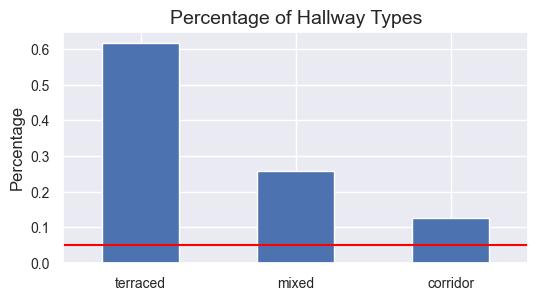

In [17]:
# Rare label hallway type

temp_df = pd.Series(df['HallwayType'].value_counts() / len(df))

plt.figure(figsize=(6, 3))
fig = temp_df.sort_values(ascending=False).plot.bar(rot=0)
fig.set_xlabel('')
fig.set_ylabel('Percentage', fontsize=12)  

fig.axhline(y=0.05, color='red')
fig.set_ylabel('Percentage', fontsize=12)  
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  
plt.title('Percentage of Hallway Types', fontsize=14)  
plt.show()

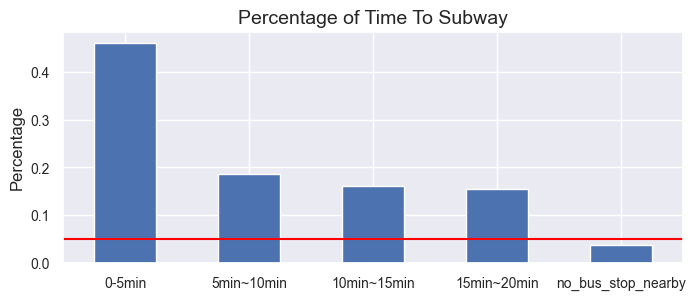

In [18]:
# Rare label time to subway

temp_df = pd.Series(df['TimeToSubway'].value_counts() / len(df))

plt.figure(figsize=(8, 3))
fig = temp_df.sort_values(ascending=False).plot.bar(rot=0)
fig.set_xlabel('')
fig.set_ylabel('Percentage', fontsize=12)  

fig.axhline(y=0.05, color='red')
fig.set_ylabel('Percentage', fontsize=12)  
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  
plt.title('Percentage of Time To Subway', fontsize=14)  
plt.show()

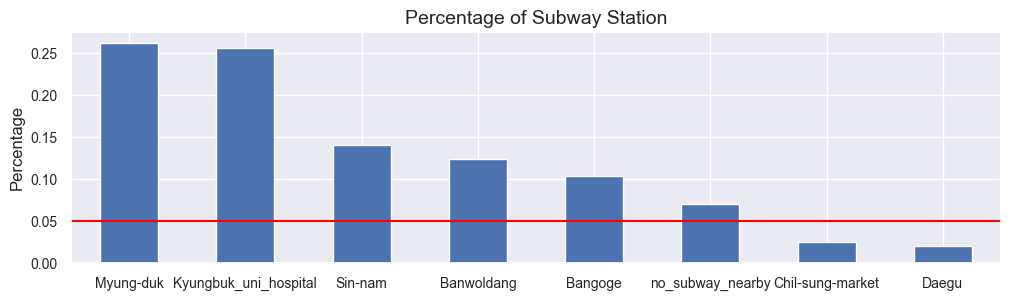

In [19]:
# Rare label time to subway

temp_df = pd.Series(df['SubwayStation'].value_counts() / len(df))

plt.figure(figsize=(12, 3))
fig = temp_df.sort_values(ascending=False).plot.bar(rot=0)
fig.set_xlabel('')
fig.set_ylabel('Percentage', fontsize=12)  

fig.axhline(y=0.05, color='red')
fig.set_ylabel('Percentage', fontsize=12)  
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  
plt.title('Percentage of Subway Station', fontsize=14)  
plt.show()

Handling rare value:

In [20]:
# Grouping rare label of subway station variabel 

df['SubwayStation'].replace(['Chil-sung-market', 'Daegu'], 'Others', inplace=True)

In [21]:
df['SubwayStation'].unique()

['Others', 'Sin-nam', 'Bangoge', 'no_subway_nearby', 'Kyungbuk_uni_hospital', 'Myung-duk', 'Banwoldang']
Categories (7, object): ['Bangoge', 'Banwoldang', 'Others', 'Kyungbuk_uni_hospital', 'Myung-duk', 'Sin-nam', 'no_subway_nearby']

__Insight__ 

* Rare label pada variabel kategorikal ditemukan dalam variabel Subway Station karena ada dua nilai yang berada di bawah tershold 0,05 yaitu stasiun bernama Chil-sung-market dan Daegu.
* Handling rare label dilakukan dengan mengelompokan kedua nilai enjadi kategori Others.

**Outlier**

Deteksi dan kuantifikasi outlier 

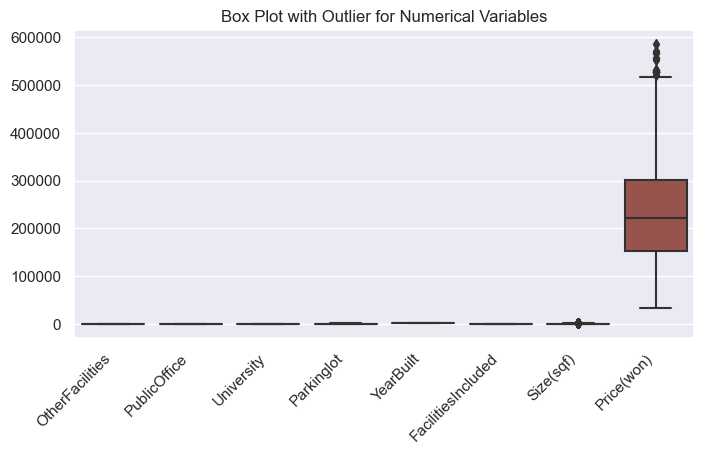

In [22]:
# Outlier in numerical

outlier_colors = ['#355070', '#6D597A', '#B56576', '#EAAC8B', '#E56B6F', '#7b2cbf', '#89b0ae', '#a44a3f']

sns.set_palette(outlier_colors)
plt.figure(figsize=(8, 4))
sns.boxplot(data=df)
plt.title("Box Plot with Outlier for Numerical Variables")
plt.xticks(rotation=45, ha="right")
plt.show()

In [23]:
# Function for searching outliers using IQR Method

def outlier_detect(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    limit = IQR*1.5
    print(f'IQR: {IQR}')

    Limit_bawah = Q1 - limit
    Limit_atas = Q3 + limit
    print(f'Limit_bawah: {Limit_bawah}')
    print(f'Limit_atas: {Limit_atas}')

    n = len(df)
    n_upper = len(np.where(df > Limit_atas)[0])/n
    n_lower = len(np.where(df < Limit_bawah)[0])/n
    print(f'Percentage of outlier: {round((n_upper + n_lower)*100, 2)}')

In [24]:
# Oultier Size(sqf)

outlier_detect(df['Size(sqf)'])

IQR: 424.0
Limit_bawah: 107.0
Limit_atas: 1803.0
Percentage of outlier: 3.11


In [25]:
# Oultier Size(sqf)

outlier_detect(df['Price(won)'])

IQR: 147345.0
Limit_bawah: -67478.5
Limit_atas: 521901.5
Percentage of outlier: 0.63


Handling outlier:

In [26]:
# Handling outlier of 'Size(sqf)'

df = df[df['Size(sqf)'] <= 1803]

__Insight__

* Outlier ditemukan pada variabel Size dan Price.
* Penanganan outlier hanya dilakukan pada variabel Size karena akan menjadi fitur untuk model. Sedangkan variabel Price tidak dilakukan handling karena persentase outlier sangat kecil dan akan menjadi variabel target.

#### **Feature Engineering**

**Encoding**

Proses encoding dalam yang akan dilakukan mengacu pada konversi fitur kategorikal menjadi bentuk yang dapat dimengerti oleh model yang akan digunakan dalam analisis atau prediksi. Dataset Daegu Apartemen memiliki beberapa fitur kategori yaitu 'HallwayType', 'TimeToSubway', dan 'SubwayStation', yang membutuhkan encoding agar dapat digunakan dalam model.

Fitur-fitur kategorikal yang akan dilakukan proses encoding adalah sebagai berikut:
* HallywayType -> fitur ini terdiri tiga kategori dan akan dilakukan encoding dengan metode 'one hot encoding', setiap kategori pada fitur kategori akan diubah menjadi fitur biner baru. Jadi, jika suatu baris memiliki kategori tertentu, nilai pada fitur biner baru akan menjadi 1, dan 0 jika tidak.
* SubwayStation -> fitur ini berisikan delapan nilai kategori yang akan dilakukan proses encoding dengan metode 'binary encoding', dalam proses ini setiap kategori akan diubah menjadi bilangan bulat (biasanya 0 atau 1 untuk fitur binary).
* TimeToSubway -> fitur ini berisikan lima kategori yang akan dilakukan proses encoding dengan metode 'ordinal encoding', karena data terkait interval waktu akan diurutkan berdasarkan urutannya.

In [27]:
# Import library for feature engineering

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import category_encoders as ce

In [28]:
# Process of encoding

ordinal_mapping = [
    {'col':'TimeToSubway', 
    'mapping':{'no_bus_stop_nearby':0, '15min~20min':1, '10min~15min':2, '5min~10min':3, '0-5min':4}}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols=['TimeToSubway'], mapping=ordinal_mapping)

transformer = ColumnTransformer([
                                ('one_hot_encoder', OneHotEncoder(drop='first'), ['HallwayType']),
                                ('binary_encoder', ce.BinaryEncoder(), ['SubwayStation']),
                                ('ordinal_encoder', ce.OrdinalEncoder(), ['TimeToSubway'])
], remainder='passthrough')

In [29]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot_encoder', OneHotEncoder(drop='first'),
                                 ['HallwayType']),
                                ('binary_encoder', BinaryEncoder(),
                                 ['SubwayStation']),
                                ('ordinal_encoder', OrdinalEncoder(),
                                 ['TimeToSubway'])])

**Split Dataset**

Setelah dilakukan encoding, dataset akan dibagi menjadi train dan test set dengan proporsi data training sebesar 70% dan data test sebesar 30%. 

In [30]:
# Dividing dataset into train and test

X = df.drop(columns='Price(won)')
y = df['Price(won)']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
x_train.shape, x_test.shape

((1831, 10), (786, 10))

**Feature Creation**

Tujuan dari prediksi harga sewa apartemen dalam dataset ini sudah cukup dapat diwakili oleh fitur-fitur yang ada dan tidak membutuhkan representasi fitur yang lebih kompleks, sehingga dalam proses feature engineering tidak membutuhkan fitur creation.

**Feature Selection**

Berhubung fitur-fitur dalam dataset tidak lebih dari 10 fitur dan dapat meminimalisir potensi underfitting, maka semua fitur tersebut akan digunakan dalam proses modeling.

__Insight__

* Variabel kategorikal 'HallwayType', 'SubwayStation', dan 'TimeToSubway' dilakukan proses encoding ke dalam bentuk numerikal agar fitur mampu dikenali saat proses modeling.
* Tahapan membuat fitur baru dalam feature engineering tidak ada karena sudah cukup diwakili oleh fitur-fitur yang ada dalam dataset. 
* Semua fitur yang ada dalam dataset akan digunakan dalam proses modeling, sehingga tidak ada fitur yang dikecualikan.

### `Modeling`

In [31]:
# Import library for modeling

# Algoritma modeling machine learning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

# Model selection and tuning
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# Algoritma modeling machine learning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

# Evaluation metrics 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Model Experiment**

In [32]:
# The algorithm for modeling
LR = LinearRegression()
KNN = KNeighborsRegressor()
DT = DecisionTreeRegressor(random_state=5)
RF = RandomForestRegressor(random_state=5)
XGB = XGBRegressor(random_state=5)

# Interpretation of model
LR_log = TransformedTargetRegressor(LR, func=np.log, inverse_func=np.exp)
KNN_log = TransformedTargetRegressor(KNN, func=np.log, inverse_func=np.exp)
DT_log = TransformedTargetRegressor(DT, func=np.log, inverse_func=np.exp)
RF_log = TransformedTargetRegressor(RF, func=np.log, inverse_func=np.exp)
XGB_log = TransformedTargetRegressor(XGB, func=np.log, inverse_func=np.exp)

# Data scaling
scaler = StandardScaler()

# Algorithm candidate
models = [LR_log, KNN_log, DT_log, RF_log, XGB_log]

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Searching the best algorithm 
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # R-Square
    model_cv_r2 = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise')
    
    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[0.7205101  0.74421724 0.70287386 0.69545456 0.76944564] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-55371.44132146 -52570.73640787 -56154.75466633 -56428.91688708
 -49872.75843741] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-43859.394211   -41884.36409249 -44964.71250811 -45319.28587961
 -40888.19558114] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.23102952 -0.21145816 -0.21738475 -0.21539059 -0.20603724] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.80348832 0.75943003 0.76324926 0.7530578  0.78897373] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegresso

In [33]:
# Evaluation of the results from 5 algorithms

pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'R-Square_Mean': nilai_mean_r2,
    'R-Square_Std': nilai_std_r2,
    'RMSE_Mean': nilai_mean_rmse,
    'RMSE_Std': nilai_std_rmse,
    'MAE_Mean': nilai_mean_mae,
    'MAE_Std': nilai_std_mae,
    'MAPE_Mean': nilai_mean_mape,
    'MAPE_Std': nilai_std_mape
})

,Model,R-Square_Mean,R-Square_Std,RMSE_Mean,RMSE_Std,MAE_Mean,MAE_Std,MAPE_Mean,MAPE_Std
0,Linear Regression,0.726500,0.027262,-54079.721544,2508.728599,-43383.190454,1729.041781,-0.216260,0.008339
1,KNN Regressor,0.773640,0.019285,-49213.167614,1817.723155,-38768.844373,1979.306613,-0.200349,0.009487
2,DecisionTree Regressor,0.801341,0.010349,-46135.854316,914.665871,-36461.416319,692.569980,-0.184655,0.004426
3,RandomForest Regressor,0.802584,0.011751,-45985.288929,1063.553252,-36439.709129,787.676954,-0.183730,0.003810
4,XGBoost Regressor,0.803068,0.011359,-45930.686128,1028.404279,-36384.834917,747.872023,-0.183241,0.004084


Kriteria model terbaik berdasarkan metrik evaluasi 

* R-Square_Mean yang lebih tinggi menunjukkan model yang lebih baik. Nilai R-Square mendekati 1 menunjukkan bahwa model dapat menjelaskan variasi target yang tinggi.
* RMSE_Mean yang lebih rendah menunjukkan model yang lebih baik. Nilai RMSE yang lebih kecil mengindikasikan bahwa kesalahan prediksi model lebih kecil.
* MAE_Mean yang lebih rendah menunjukkan model yang lebih baik. Nilai MAE yang lebih kecil menunjukkan bahwa model memiliki kesalahan prediksi yang lebih kecil.
* MAPE_Mean yang lebih rendah menunjukkan model yang lebih baik. Nilai MAPE yang lebih kecil mengindikasikan bahwa persentase kesalahan prediksi model lebih rendah.

**Benchmark Model**

Bandingkan model regresi dengan algoritma model regresi untuk mendapatkan benchmark model terbaik.

In [34]:
# Benchmark Stand Alone

models = {LinearRegression(), KNeighborsRegressor()}

score_r2 = []
score_rmse = []
score_mae = []
score_mape = []

# Testing Prediction
for model in models:

    model_pipeline = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', model)
    ])

    model_pipeline.fit(x_train, y_train)
    y_pred = model_pipeline.predict(x_test)

    score_r2.append(r2_score(y_test, y_pred))
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'R-Square': score_r2, 'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=[type(m).__name__ for m in models])

print('Testing result before tuning')
display(score_before_tuning)

Testing result before tuning


,R-Square,RMSE,MAE,MAPE
KNeighborsRegressor,0.750343,49085.561915,39040.014249,0.202300
LinearRegression,0.731396,50914.082677,42133.514616,0.220098


In [35]:
# Benchmark Ensemble

models = {'DecisionTree Regression': DecisionTreeRegressor(random_state=5),
    'RandomForest': RandomForestRegressor(random_state=5), 
    'XGB': XGBRegressor(random_state=5)   
}

score_r2 = []
score_rmse = []
score_mae = []
score_mape = []

# Testing Prediction
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    score_r2.append(r2_score(y_test, y_pred))
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'R-Square': score_r2, 'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())

print('Testing result before tuning')
display(score_before_tuning)

Testing result before tuning


,R-Square,RMSE,MAE,MAPE
DecisionTree Regression,0.776291,46464.722067,37568.720774,0.197461
RandomForest,0.781227,45949.243261,37411.667917,0.196331
XGB,0.782477,45817.832041,37328.281101,0.194875


__Insight__

*  Metrik evaluasi yang digunakan untuk memilih model terbaik yaitu dengan melihat nilai R-Square, RMSE, MAE, dan MAPE. 
* Kriteria model terbaik berdasarkan metrik evaluasi R-Square dengan melihat nilai yang mendekati 1. Sedangkan untuk metrik RMSE, MAE, dan MAPE dapat memilih nilai yang errornya paling kecil.
* Hasil benchmark sebelum tuning dengan model stand alone diperoleh model terbaik dengan algoritma KNeighborsRegressor. Sedangkan Benchmark menggunakan ensemble didapatkan model terbaik dengan algoritma model XGB. Untuk itu model yang akan dilakukan hyperparameter tunning pada tahap selanjutnya adalah menggunakan metode XGB karena antara stand alone dengan ensemble hasilnya lebih baik menggunakan ensemble.

**Hyperparameter tuning**

Melakukan optimasi model terbaik dari hasil benchmark. Hyperparameter tuning yang digunakan pada proses tuning mengacu pada model terbaik yaitu XGB. Parameter yang perlu diatur berbasis tree antara lain yaitu max_depth, learning_rate, n_estimators, subsample, gamma, colsample_bytree, dan reg_alpha. Penjelasan untuk parameter lebih lanjut dapat dilihat pada sumber: (https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).         

In [36]:
# Tuning with XGBoost 

# Tree depth
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# The number or tree
n_estimators = list(np.arange(100, 201))

# Percentage of rows per tree in the training set
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11))

# Number of features used for each tree (as a percentage of the total number of columns in the training set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10))

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

xgb = XGBRegressor(random_state=5, verbosity=0)

# Define algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', 
    random_state = 1  
)

# Fitting data training into best model
random_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('binary_encoder',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('ordinal_encoder',
                                                                               OrdinalEncoder(),
                                                                               ['TimeToSubway'])])),
                                             ('scaler'...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['r2', 'neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [37]:
# Result tuning rank based on R-Squared
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_r2', 'rank_test_neg_root_mean_squared_error', 
            'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).sample(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
45,0.239249,0.008148,0.021604,0.002930,0.6,0.007743,123,4,0.44,6,...,821.457644,18,-0.198575,-0.190594,-0.18459,-0.190913,-0.188518,-0.190638,0.004564,6
10,0.196554,0.004308,0.019732,0.004681,0.4,0.059948,124,4,0.84,1,...,817.812679,30,-0.201726,-0.194778,-0.19354,-0.183269,-0.190064,-0.192675,0.006040,26
15,0.204731,0.006470,0.023023,0.003308,0.7,0.021544,102,9,0.7,5,...,610.259141,23,-0.202032,-0.190373,-0.18824,-0.188532,-0.188606,-0.191557,0.005291,14


In [38]:
# XGB tuning result

xgb_results = ({
    'Model': ['XGBoost'],
    'Best_score': [random_xgb.best_score_],
    'Best_params': [random_xgb.best_params_]
})

print(xgb_results)

{'Model': ['XGBoost'], 'Best_score': [-45638.621802441776], 'Best_params': [{'model__subsample': 0.9, 'model__reg_alpha': 10.0, 'model__n_estimators': 146, 'model__max_depth': 4, 'model__learning_rate': 0.06, 'model__gamma': 5, 'model__colsample_bytree': 0.4}]}


**Testing after tuning**

Prediksi test set menggunakan XGB model dan hyperparameters tuning. 

In [39]:
# Model XGB
model = {'XGB': XGBRegressor(random_state=5)}

# Model based on best estimator
xgb_tuning = random_xgb.best_estimator_

# Model fitting using XGB
xgb_tuning.fit(x_train, y_train)

# Prediction of test set
y_pred_xgb_tuning = xgb_tuning.predict(x_test)

# Evaluation metrics after tuning
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'R-Square': r2_xgb_tuning, 'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
print('Testing result after tuning')
score_after_tuning

Testing result after tuning


,R-Square,RMSE,MAE,MAPE
XGB,0.784186,45637.440291,37368.200322,0.197461


__Insight__

Hasil pengujian setelah dilakukan tuning menggunakan XGB diperoleh nilai R-Square sebesar 0.784186, RMSE sebesar 45637.440291, MAE sebesar 37368.200322, dan MAPE sebesar 0.197461.

**Performance Comparison**

Perbandingan performa model sebelum dan sesudah dilakukan hyperparameter tuning.

In [40]:
# Before hyperparameter tuning

pd.DataFrame(score_before_tuning.loc['XGB']).T

,R-Square,RMSE,MAE,MAPE
XGB,0.782477,45817.832041,37328.281101,0.194875


In [41]:
# After hyperparameter tuning

score_after_tuning

,R-Square,RMSE,MAE,MAPE
XGB,0.784186,45637.440291,37368.200322,0.197461


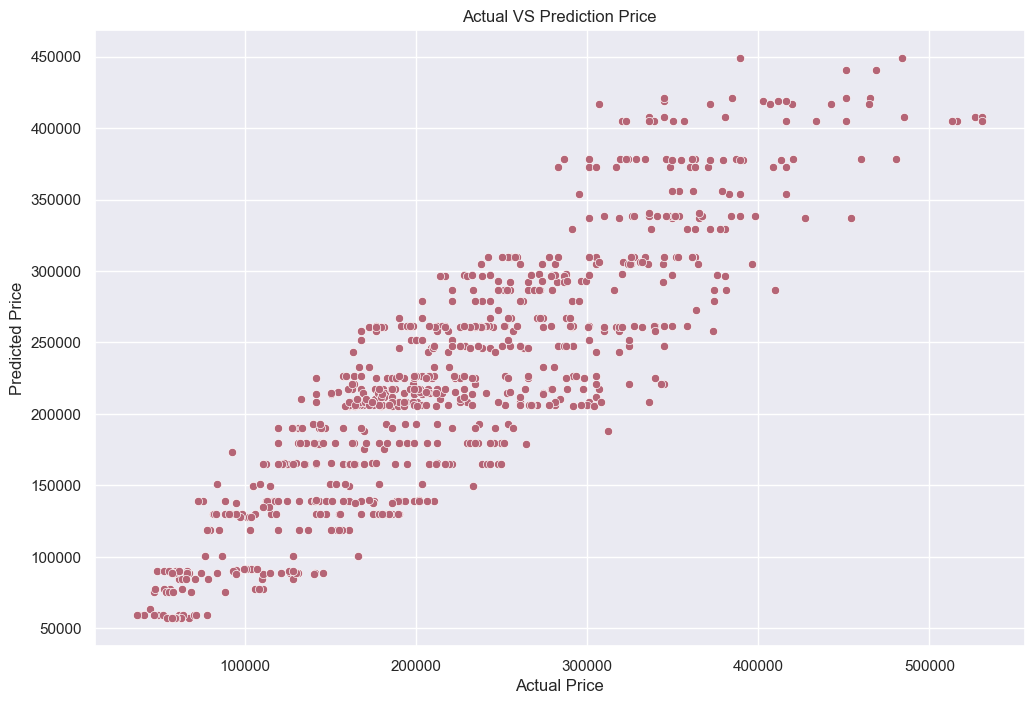

In [42]:
# Scatterplot actual vs prediction price

plt.figure(figsize=(12, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning, color='#B56576').set(title='Actual VS Prediction Price', 
         xlabel='Actual Price', ylabel='Predicted Price')
plt.show()

__Insight__

* Perbandingan hasil prediksi setelah dilakukan tuning menggunakan algoritma model XGB, nilai R-Square model mengalami peningkatan dari 0.782477 menjadi 0.784186. Sedangakan berdasarkan metrik MAPE masih berada di range 19%. Pemilihan metrik evaluasi MAPE menjadi tolak ukur karena dapat melihat persentase errornya. Berdasarkan Forcasting Accuracy, nilai MAPE antara 11%-20% termasuk ke dalam kategori 'Good Forcast' (Lewis, 1982).

* Berdasarkan grafik scatterplot, jika harga aktual semakin besar dan mendekati dengan garis diagonal, maka harga pridiksi juga akan semakin besar.

Sumber: 

* Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting

* http://dx.doi.org/10.12982/cmujns.2014.0044

**Residual**

Perbedaan antara nilai aktual target (observasi) dan nilai yang diprediksi oleh model. 

In [43]:
# Residual checking

# Residu = y_actual - y_prediksi

residual = y_test-y_pred_xgb_tuning

df_residual = pd.DataFrame({
    'y_pred': y_pred_xgb_tuning,
    'residual': residual 
})

df_residual.head()

,y_pred,residual
2085,220872.609375,-22642.609375
2228,77445.007812,-20808.007812
863,337139.187500,90293.812500
2026,149493.625000,-34449.625000
2272,205992.890625,-36966.890625


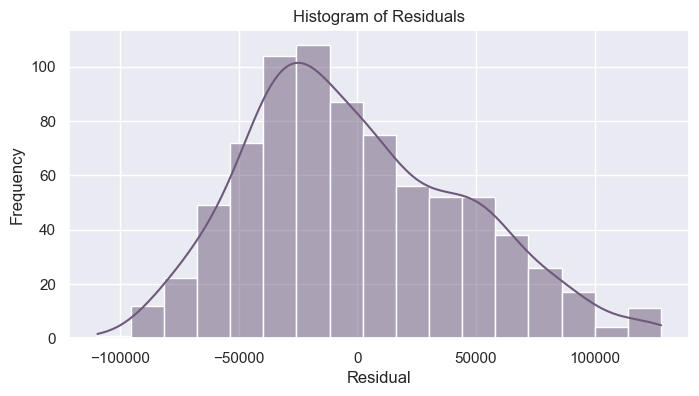

In [44]:
# Histogram of residuals

plt.figure(figsize=(8, 4))
sns.histplot(data=df_residual, x='residual', kde=True, color='#6D597A')
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

In [45]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
stat, p = shapiro(df_residual['residual'])
print('Shapiro-Wilk Test:')
print('Statistic:', stat)
print('p-value:', p)

# Interpret the Shapiro-Wilk test
alpha = 0.05
if p > alpha:
    print('Residuals are normally distributed (fail to reject H0)')
else:
    print('Residuals are not normally distributed (reject H0)')

Shapiro-Wilk Test:
Statistic: 0.9780927896499634
p-value: 1.8077674912575503e-09
Residuals are not normally distributed (reject H0)


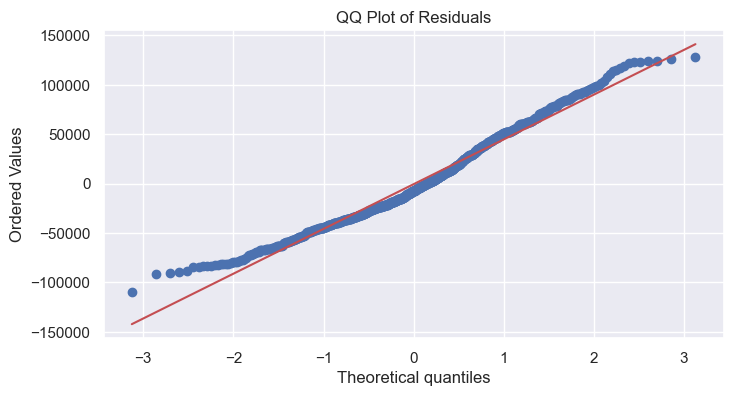

In [46]:
import scipy.stats as stats

plt.figure(figsize=(8, 4))
stats.probplot(df_residual['residual'], plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

__Insight__

* Grafik histogram menunjukan bentuk distribusi dari residu yang memiliki skewness ke kanan.
* Tes Shapiro-Wilk digunakan untuk menguji apakah residu memiliki distribusi normal. Setelah dilakukan pengujian, residu menunjukan distribusi yang tidak normal.
* QQ plot digunakan untuk memvisualisasikan distribusi residu dengan distribusi normal. Titik-titik pada plot mendekati garis lurus, hal tersebut menunjukan bahwa residu mendekati distribusi normal.

**Feature Importances**

Mengidentifikasi fitur-fitur mana yang paling relevan atau signifikan dalam mempengaruhi prediksi harga sewa.

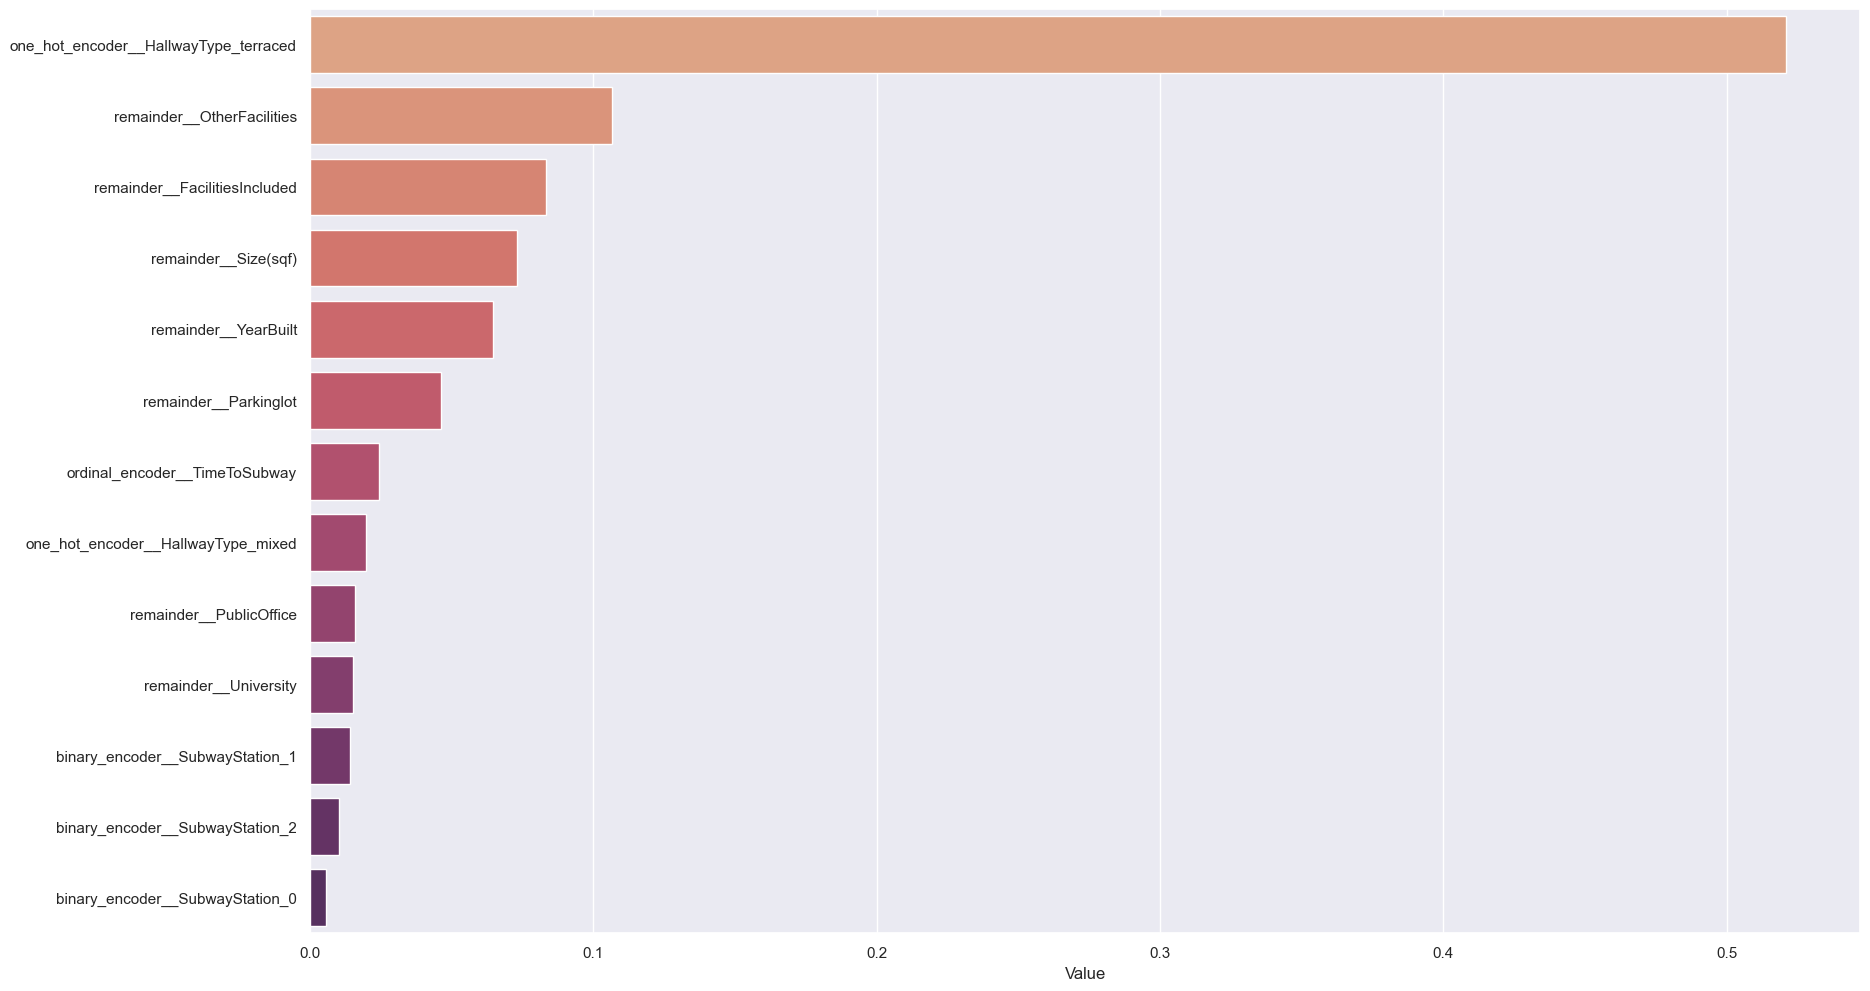

In [47]:
# Plot feature importances

feature_imp = pd.DataFrame(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out(), 
                           columns=['Value']).sort_values(by='Value', ascending=False)

plt.figure(figsize=(20,12))
sns.barplot(data=feature_imp, x='Value', y=feature_imp.index, palette='flare');

__Insight__

* Fitur yang paling berpengaruh dalam prediksi harga sewa apartemen di Daegu adalah hallway type 'terraced'. Berdasarkan eksplorasi data singkat di tahap data preprocessing aprtemen dengan tipe hallway terraced memiliki rata-rata harga sewa yang lebih tinggi daripada tipe yang lain. Hal tersebut juga berkaitan dengan ketersediaan fasilitas di sekitar apartemen yang juga menjadi pertimbangan dalam penentuan harga sewa apartemen.  
* Empat fitur terpenting setelah hallway type yaitu other facilities, facilities included, size(sqf), dan year built. Keberadaan fasilitas umum di sekitar apartemen dan fasilitas di dalam apartemen.

**Model Explaination**

* Peningkatan Performa Model
    
    Setelah melakukan tuning menggunakan algoritma model XGBoost, terjadi peningkatan pada nilai R-Square dari 0.782477 menjadi 0.784186. Ini menunjukkan bahwa model setelah tuning memiliki kemampuan yang lebih baik dalam menjelaskan variasi data target. R-Square merupakan metrik yang mengukur seberapa baik variasi dalam data target dapat dijelaskan oleh model. Peningkatan ini menandakan bahwa model yang sudah di-tune mampu memberikan estimasi yang lebih dekat dengan nilai sebenarnya.

* Penjelasan Scatterplot

    Grafik scatterplot menggambarkan hubungan antara harga aktual dengan harga prediksi. Dikatakan bahwa ketika harga aktual semakin besar dan mendekati garis diagonal, maka harga prediksi juga semakin besar. Hal ini mengindikasikan bahwa model cenderung memiliki performa yang lebih baik dalam memprediksi harga yang lebih tinggi, terutama ketika harga aktual memiliki variabilitas yang besar. Jika harga aktual dan harga prediksi cenderung sama atau memiliki perbedaan yang kecil, ini menunjukkan bahwa model memiliki performa yang lebih baik dalam kasus-kasus tersebut.

* Analisis Feature Importance
    
    Berdasarkan analisis feature importance, terdapat tiga fitur yang memiliki pengaruh signifikan dalam prediksi harga sewa apartemen di Daegu:

    1. Hallway Type 'Terraced'
        
        Fitur ini menjadi faktor paling berpengaruh dalam prediksi harga sewa. Apartemen dengan tipe 'hallway' terraced memiliki harga sewa yang lebih tinggi dibandingkan dengan tipe lainnya. Hal ini bisa dikaitkan dengan lokasi yang mungkin lebih premium, aksesibilitas yang baik, serta fasilitas di sekitarnya.

    2. Other Facilities
        
        Keberadaan fasilitas umum di sekitar apartemen menjadi faktor penting dalam menentukan harga sewa. Fasilitas-fasilitas seperti taman, toko, restoran, dan sejenisnya di sekitar apartemen memberikan nilai tambah dan memengaruhi harga sewa.

    3. Facilities Included
        
        Fasilitas yang tersedia di dalam apartemen juga berperan dalam penentuan harga sewa. Semakin lengkap dan nyaman fasilitas yang disediakan, semakin tinggi harga sewa yang diharapkan. Fasilitas seperti kolam renang, gym, atau ruang pertemuan bisa menjadi pendorong harga sewa yang lebih tinggi.


**Model Limitation**

* Batasan atau limitasi dalam model terkait pengelompokan nilai rare label di bawah threshold mengacu pada tindakan menggabungkan atau mengelompokkan nilai-nilai yang jarang muncul dalam suatu fitur atau kolom ke dalam satu kategori umum yang disebut "Others". Tujuan dari langkah ini adalah untuk mengatasi masalah ketidakseimbangan distribusi nilai dalam fitur yang dapat berdampak pada performa model.

* Adanya perbedaan antara hasil tes normalitas Shapiro-Wilk dan visualisasi QQ plot dapat mengindikasikan adanya ketidakcocokan dalam distribusi residu. Meskipun QQ plot menunjukkan bahwa residu mendekati distribusi normal, tes Shapiro-Wilk tidak memberikan hasil yang mendukung normalitas. Ini menunjukkan adanya ketidakpastian dalam interpretasi distribusi residu.

* Model hanya mampu memprediksi harga apartemen terhadap 10 fitur terkait yaitu HallwayType, TimeToSubway, SubwayStation, OtherFacilities, PublicOffice, University, Parkinglot, YearBuilt, FacilitiesIncluded, dan Size(sqf). Model belum memperhatikan fitur-fitur lain seperti lokasi geografis yang lebih spesifik, kondisi sosial ekonomi daerah, dan faktor-faktor eksternal lainnya yang dapat mempengaruhi harga sewa.

### `Conclusion`

Kesimpulan dari tahapan model prediksi harga sewa apartemen yaitu sebagai berikut.

* Pengembangan model prediksi harga sewa apartemen di kota Daegu, dilakukan dalam berbagai tahap mulai dari pemahaman masalah bisnis, pemrosesan data, pembuatan model, hingga analisis hasil. Dengan menggunakan algoritma XGBoost dan melalui tuning parameter yang cermat, berhasil meningkatkan nilai R-Square model dari 0.782477 menjadi 0.784186. Meskipun demikian, perlu dicatat bahwa metrik evaluasi MAPE masih tetap berada dalam kisaran 19%. Pemilihan MAPE sebagai tolak ukur dipilih karena kemampuannya dalam menggambarkan persentase error secara langsung. Berdasarkan kategori Forcasting Accuracy, nilai MAPE antara 11%-20% termasuk dalam kategori 'Good Forecast' (Lewis, 1982), hal tersebut menunjukkan performa yang layak. Hasil tersebut dapat dijadikan acuan untuk menetapkan harga sewa yang optimal karena rentang error masih kurang dari 20%. Contoh penetapan prediksi harga sewa dengan menerapkan nilai MAPE yaitu misalkan mengambil rata-rata harga sewa aktual sebesar 221767 (won), maka dengan persentase error 19%, harga sewa prediksinya dapat berkurang atau bertambah sebesar 42135,73 (won). Pengembang apartemen dapat mengimplementasikan hasil tersebut untuk strategi dalam meningkatkan profit.

* Analisis feature importance menyoroti tiga fitur utama yang mempengaruhi prediksi harga sewa apartemen di Daegu. Pertama, tipe koridor (hallway type) 'Terraced' memegang peranan paling signifikan dalam menentukan harga sewa. Apartemen dengan tipe koridor ini cenderung memiliki harga sewa yang lebih tinggi, kemungkinan karena faktor lokasi premium dan aksesibilitas yang baik. Fitur kedua adalah 'Other Facilities', yang menggambarkan pentingnya adanya fasilitas umum di sekitar apartemen dalam menentukan harga sewa. Fasilitas seperti taman, toko, dan restoran berkontribusi pada nilai tambah dan pengaruh harga. Terakhir, 'Facilities Included' atau fasilitas yang disediakan di dalam apartemen turut mempengaruhi harga. Semakin lengkap dan nyaman fasilitas yang ada, semakin tinggi harga sewa yang diharapkan.

* Grafik scatterplot mengilustrasikan hubungan antara harga aktual dan harga prediksi. Saat harga aktual mendekati garis diagonal, harga prediksi cenderung mendekati harga aktual. Ini menandakan model memiliki performa yang baik dalam memprediksi harga yang lebih tinggi dan variabel. Model juga terbukti efektif dalam situasi di mana harga aktual dan harga prediksi hampir sama, menunjukkan akurasi yang baik dalam kasus-kasus tersebut.

Namun, perlu diingat bahwa model memiliki batasan, seperti pemodelan hanya dengan 10 fitur tertentu yang mungkin tidak mencakup semua faktor yang memengaruhi harga sewa apartemen. Oleh karena itu, dalam pengembangan selanjutnya, dapat dipertimbangkan untuk menyertakan lebih banyak fitur dan melibatkan algoritma lain untuk menganalisis dataset dengan lebih komprehensif.

### `Recommendations`

Pengembangan model agar lebih baik lagi untuk masa yang akan datang dapat mempertimbangkan hal-hal berikut ini.

* Data Preprocessing
   - Feature Engineering: Selain fitur yang telah dipertimbangkan, pertimbangkan untuk mencari atau membuat fitur baru yang memiliki korelasi yang kuat dengan variabel target.

   - Outlier Handling: Telusuri kembali data untuk mengidentifikasi dan menangani outlier yang mungkin mempengaruhi performa model. Dapat mencoba teknik seperti transformasi data atau penggunaan model yang lebih tahan terhadap outlier.

* Modeling
   - Ensemble Methods: Pertimbangkan untuk menggunakan teknik ensemble seperti Random Forest atau Gradient Boosting. Ensemble methods dapat meningkatkan performa model dengan menggabungkan beberapa model yang berbeda.

   - Algoritma Lain: Eksplorasi algoritma lain selain yang telah digunakan, seperti Support Vector Machines (SVM), Neural Networks, atau algoritma lain yang sesuai untuk masalah regresi.

* Residual Analysis
   - Transformasi Residu: Jika distribusi residu tidak normal, pertimbangkan untuk melakukan transformasi data pada target atau fitur-fitur tertentu sehingga residu mendekati distribusi normal.

   - Penanganan Residu Skewed: Jika terdapat kecondongan (skewness) dalam residu, mencoba untuk transformasi data atau menggunakan model yang lebih tahan terhadap data yang tidak simetris.

* Model Limitation
   - Inklusi Fitur Tambahan: Pertimbangkan untuk memasukkan lebih banyak fitur yang mungkin memiliki pengaruh terhadap harga sewa apartemen. Perluas cakupan data dengan menggabungkan data eksternal seperti data sosial ekonomi daerah atau data kepadatan penduduk.

   - Model yang Lebih Kompleks: Jika memungkinkan, eksplorasi model yang lebih kompleks seperti Neural Networks. Model ini dapat menangkap pola-pola yang lebih kompleks dalam data, meskipun perlu perhatian khusus terhadap overfitting.

* Model Evaluation
    
   Penting untuk terus melakukan iterasi dan pengujian model dengan variasi yang berbeda untuk memahami apa yang membuat performa model lebih baik. Evaluasi yang lebih mendalam terhadap setiap tahap dalam pengembangan model juga akan membantu dalam mengidentifikasi area-area yang dapat ditingkatkan lebih lanjut.

In [ ]:
# Saving model

import pickle

pickle.dump(xgb_tuning, open('Price_Prediction_Daegu_Apartment.sav', 'wb'))

# Load model
file_name = 'Price_Prediction_Daegu_Apartment.sav'
loaded_model = pickle.load(open(file_name, 'rb'))

In [ ]:

np.sqrt(mean_squared_error(y_test, loaded_model.predict(x_test)))